In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from brian2 import *                     

In [5]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    

In [22]:
train_im = np.swapaxes(train_images.reshape((60000,784)),0,1)
print(train_im.shape)


(784, 60000)


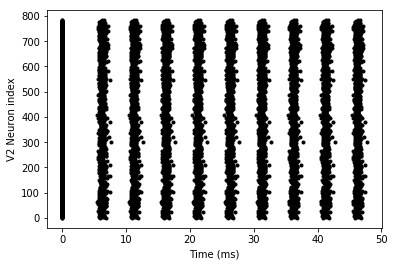

In [49]:
start_scope()



taum = 10*ms
taupre = 20*ms
taupost = taupre
Ee = 0*mV
vt = -54*mV
vr = -60*mV
El = -74*mV
taue = 5*ms
F = 15*Hz
gmax = .01
dApre = .01
dApost = -dApre * taupre / taupost * 1.05
dApost *= gmax
dApre *= gmax

eqs_neurons = '''
dv/dt = (ge * (Ee-vr) + El - v) / taum : volt
dge/dt = -ge / taue : 1
'''



#equations for the neuron layers
Poisson_layer = PoissonGroup(784,(train_im[:,0])*Hz + 10*Hz)
layer_V1 = NeuronGroup(784, eqs_neurons, threshold='v>vt', reset='v = vr', refractory=5*ms, method='linear')
layer_V2 = NeuronGroup(784, eqs_neurons, threshold='v>vt', reset='v = vr', refractory=5*ms, method='linear')


#poisson to layer 1
P_to_V1 = Synapses(Poisson_layer, layer_V1,
             '''w : 1
                dApre/dt = -Apre / taupre : 1 (event-driven)
                dApost/dt = -Apost / taupost : 1 (event-driven)''',
             on_pre='''ge += w
                    Apre += dApre
                    w = clip(w + Apost, 0, gmax)''',
             on_post='''Apost += dApost
                     w = clip(w + Apre, 0, gmax)''',
             )
P_to_V1.connect()
P_to_V1.w = 'rand() * gmax'




#layer 1 to layer 2
V1_to_V2 = Synapses(layer_V1, layer_V2,
             '''w : 1
                dApre/dt = -Apre / taupre : 1 (event-driven)
                dApost/dt = -Apost / taupost : 1 (event-driven)''',
             on_pre='''ge += w
                    Apre += dApre
                    w = clip(w + Apost, 0, gmax)''',
             on_post='''Apost += dApost
                     w = clip(w + Apre, 0, gmax)''',
             )
V1_to_V2.connect(condition='i!=j', p=0.5)
V1_to_V2.w = 'gmax'



spikemon_P = SpikeMonitor(Poisson_layer)
spikemon_V1 = SpikeMonitor(layer_V1)
spikemon_V2 = SpikeMonitor(layer_V2)


run(50*ms)

plt.plot(spikemon_V1.t/ms, spikemon_V1.i,'.k')
xlabel('Time (ms)')
ylabel('V2 Neuron index');

In [ ]:
plt.figure(1)

plt.subplot(611)
plt.plot(spikemon_P.t/ms, spikemon_P.i,'.k')
xlabel('Time (ms)')
ylabel('Poisson Neuron index');

plt.subplot(612)
plt.plot(spikemon_V1.t/ms, spikemon_V1.i,'.k')
xlabel('Time (ms)')
ylabel('V1 Neuron index');

plt.subplot(613)
plt.plot(spikemon_V2.t/ms, spikemon_V2.i,'.k')
xlabel('Time (ms)')
ylabel('V2 Neuron index');

plt.subplot(614)
plt.plot(V1_to_V2.w / gmax, '.k')
ylabel('Weight / gmax')
xlabel('Synapse index')

plt.subplot(615)
plt.hist(V1_to_V2.w / gmax, 20)
xlabel('Weight / gmax')

plt.subplot(616)
plt.plot(spikemon_V2.t/second, spikemon_V2.w.T/gmax)
xlabel('Time (s)')
ylabel('Weight / gmax')

plt.show()

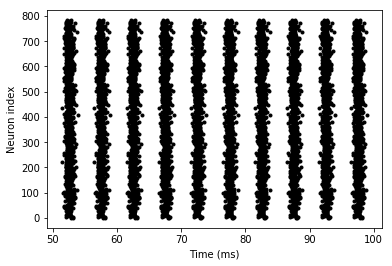

In [28]:
spikemon_V1 = SpikeMonitor(layer_V1)

run(50*ms)

plot(spikemon_V1.t/ms, spikemon_V1.i,'.k')
xlabel('Time (ms)')
ylabel('Neuron index');

In [16]:

V1_to_V1 = Synapses(layer_V1, layer_V1, delta_rule, on_pre=pre_delta, on_post=post_delta, method='linear') 
V1_to_V1.connect(condition='i!=j', p=1)



layer_V2 = NeuronGroup(784, eqs_neurons, threshold='v>vt', reset='v = vr', refractory=5*ms, method='linear')

V1_to_V2 = Synapses(layer_V1, layer_V2, delta_rule, on_pre=pre_delta, on_post=post_delta, method='linear') 
V1_to_V2.connect(condition='i!=j', p=1)

V2_to_V1 = Synapses(layer_V2, layer_V1, delta_rule, on_pre=pre_delta, on_post=post_delta, method='linear') 
V2_to_V1.connect(condition='i!=j', p=1)

V2_to_V2 = Synapses(layer_V2, layer_V2, delta_rule, on_pre=pre_delta, on_post=post_delta, method='linear') 
V2_to_V2.connect(condition='i!=j', p=1)

[ 0.   0.   0.  ... 49.9 49.9 49.9] ms


{'t': {0: array([], dtype=float64) * second, 1: array([7.6]) * msecond, 2: array([6.1]) * msecond, 3: array([], dtype=float64) * second, 4: array([], dtype=float64) * second, 5: array([], dtype=float64) * second, 6: array([], dtype=float64) * second, 7: array([], dtype=float64) * second, 8: array([43.7]) * msecond, 9: array([18.6, 31.1]) * msecond, 10: array([], dtype=float64) * second, 11: array([], dtype=float64) * second, 12: array([], dtype=float64) * second, 13: array([], dtype=float64) * second, 14: array([], dtype=float64) * second, 15: array([], dtype=float64) * second, 16: array([], dtype=float64) * second, 17: array([12.9]) * msecond, 18: array([46.1]) * msecond, 19: array([], dtype=float64) * second, 20: array([], dtype=float64) * second, 21: array([26.5]) * msecond, 22: array([], dtype=float64) * second, 23: array([], dtype=float64) * second, 24: array([], dtype=float64) * second, 25: array([], dtype=float64) * second, 26: array([], dtype=float64) * second, 27: array([], dt